# RECURRENT NEURAL NETWORK: MNIST DATABASE 

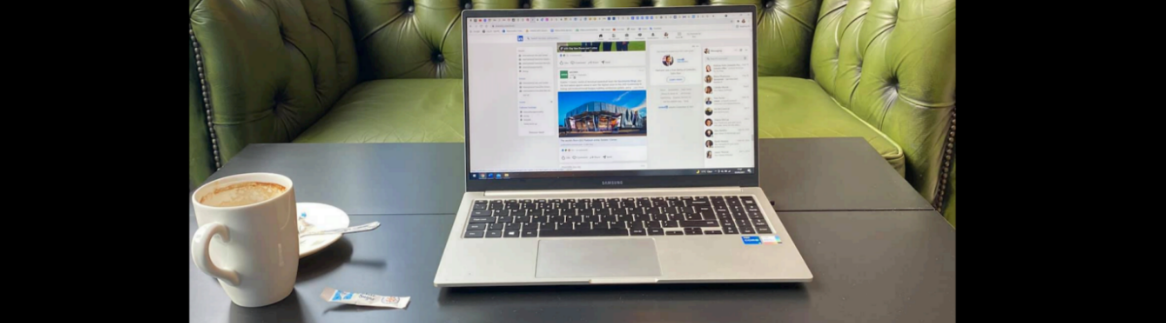

## Hemant Thapa

### Table of Contents

1. **MNIST (Modified National Institute of Standards and Technology database)**
   - Introduction to the MNIST dataset.
   - Loading the dataset for use.

2. **Pre Processing**
   - Data normalization and reshaping.
   - Data augmentation (if used).

3. **Model Creation**
   - Building the neural network architecture.
   - Defining layers, activation functions, and compiling the model.

4. **Training Model**
   - Training the model on the MNIST dataset.
   - Setting up training parameters (epochs, batch size, etc.).

5. **Loss & Accuracy Plot**
   - Plotting training/validation loss and accuracy.
   - Analyzing overfitting/underfitting.

6. **Predictions**
   - Using the model to make predictions on test data.
   - Visualizing the predictions.

7. **Confusion Matrix**
   - Creating a confusion matrix to evaluate model performance.
   - Interpreting the confusion matrix.

8. **ROC Curve**
   - Plotting the Receiver Operating Characteristic curve.
   - Analyzing the area under the curve (AUC) for model performance.

9. **Classification Report**
   - Generating a classification report.
   - Detailed metrics (precision, recall, f1-score) for each class.

10. **Correct & Incorrect Classes Classification**
    - Identifying correctly and incorrectly classified examples.
    - Visualising and analysing misclassifications.

11. **Each Classes Accuracy**
    - Calculating and comparing accuracy for each digit class.
    - Discussing any discrepancies in class-wise performance.


### 1. Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import warnings

warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import  plot_model

### 2. Loading Dataset

In [3]:
#dataset that is used to train machine learning models
len(mnist.load_data()[0])

2

In [4]:
#dataset that is used to test machine learning models
len(mnist.load_data()[1])

2

In [5]:
train_image, train_label = mnist.load_data()[0]

In [6]:
test_image, test_label = mnist.load_data()[1]

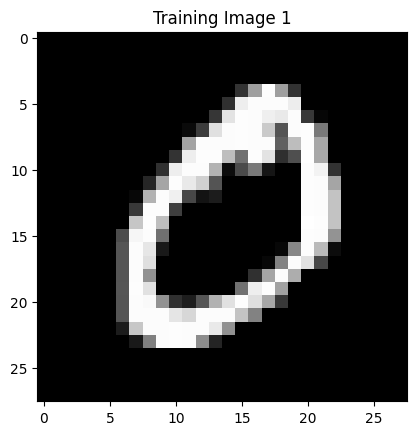

In [7]:
#inspecting images
index = 1
plt.imshow(train_image[index], cmap='gray')
plt.title(f"Training Image {index}")
plt.show()

In [8]:
#plotting overall images
def plot_images(images, indices, title_prefix="Image"):
    num_images = len(indices)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i, index in enumerate(indices):
        ax = axes[i]
        ax.imshow(images[index], cmap='gray')
        ax.set_title(f"{title_prefix} {index}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

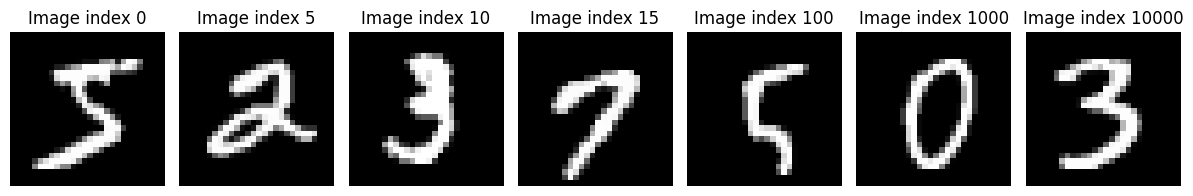

In [9]:
indices = [0, 5, 10, 15, 100, 1000, 10000] 
plot_images(train_image, indices, title_prefix="Image index")

### 3. Pre Processing 

In [10]:
#test and train dataset shape
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

- The first number, 60000, represents the number of images in the dataset. This means that there are 60,000 images in the training dataset.
- The second number, 28, represents the height of each image in pixels. Each image is 28 pixels tall.
- The third number, also 28, represents the width of each image in pixels. Each image is 28 pixels wide.

In [11]:
train_label.shape, test_label.shape

((60000,), (10000,))

- The shape (10000,) indicates that there are 10,000 labels in the testing dataset.
- Each label corresponds to one of the 10,000 images in the testing dataset.

In [12]:
train_image = train_image.reshape((60000, 28, 28)).astype('float32')/255
test_image = test_image.reshape((10000, 28, 28)).astype('float32')/255

#### - Unique value for train images 

In [13]:
print(np.unique(train_image))

[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902
 0.32941177 0.33333334 0.3372549  0.34117648 0.34509805 0.3490196

#### - Uique Value for test images

In [14]:
print(np.unique(test_image))

[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902
 0.32941177 0.33333334 0.3372549  0.34117648 0.34509805 0.3490196

####  - Train and Test Label has unique count of 0 1 2 3 4 5 6 7 8 9 in our dataset. 

In [15]:
print(np.unique(train_label))
print(np.unique(test_label))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [16]:
#converting into categorical value
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [17]:
print(np.unique(train_label))
print(np.unique(test_label))

[0. 1.]
[0. 1.]


### 4. Creating Model 

In [18]:
#earlystopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [19]:
#sequential model for RNN
rnn_model = Sequential([
    #simple RNN layer with 64 units and 'relu' activation function.
    SimpleRNN(64, activation='relu', input_shape=(28, 28)),
    #dropout layer to prevent overfitting.
    Dropout(0.5),
    #fully connected (dense) layer with 64 units and 'relu' activation.
    Dense(64, activation='relu'),
    #fully connected layer with 10 units and 'softmax' activation.
    Dense(10, activation='softmax')
])

In [20]:
rnn_model.compile(
    #adam optimizer adapts the learning rate during training.
    optimizer='adam', 
    #categorical_crossentropy loss for multiclass classification tasks.
    loss='categorical_crossentropy',
    #accuracy metric to measure the fraction of correctly classified samples.
    metrics=['accuracy']
)

In [21]:
#training the RNN model and saving history
history = rnn_model.fit(train_image, train_label, 
                        epochs=50, 
                        batch_size=16,
                        verbose=1, 
                        validation_data=(test_image, test_label),
                        callbacks=[early_stopping])

Epoch 1/50
3750/3750 [==============================] - 16s 4ms/step - loss: 0.8322 - accuracy: 0.7106 - val_loss: 0.3704 - val_accuracy: 0.8815
Epoch 2/50
3750/3750 [==============================] - 15s 4ms/step - loss: 0.4172 - accuracy: 0.8806 - val_loss: 0.2513 - val_accuracy: 0.9249
Epoch 3/50
3750/3750 [==============================] - 15s 4ms/step - loss: 0.3307 - accuracy: 0.9077 - val_loss: 0.3282 - val_accuracy: 0.8960
Epoch 4/50
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2890 - accuracy: 0.9203 - val_loss: 0.2237 - val_accuracy: 0.9380
Epoch 5/50
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2628 - accuracy: 0.9291 - val_loss: 0.2376 - val_accuracy: 0.9312
Epoch 6/50
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2427 - accuracy: 0.9354 - val_loss: 0.2259 - val_accuracy: 0.9388
Epoch 7/50
3750/3750 [==============================] - 15s 4ms/step - loss: 0.2388 - accuracy: 0.9366 - val_loss: 0.1638 - val_ac

### 5. Model Summary 

In [23]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 10762 (42.04 KB)
Trainable params: 10762 (42.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 6. Loss and Accuracy

In [24]:
#training and validation loss values from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

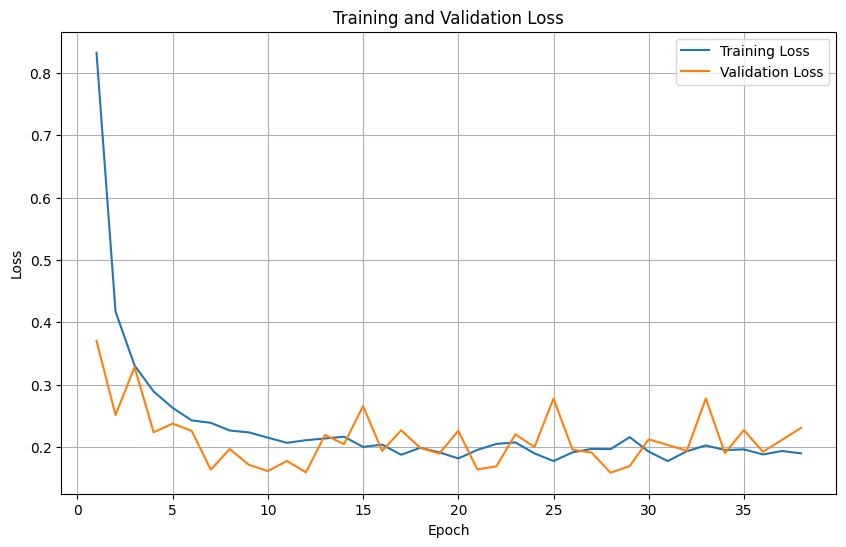

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#accuracy values from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

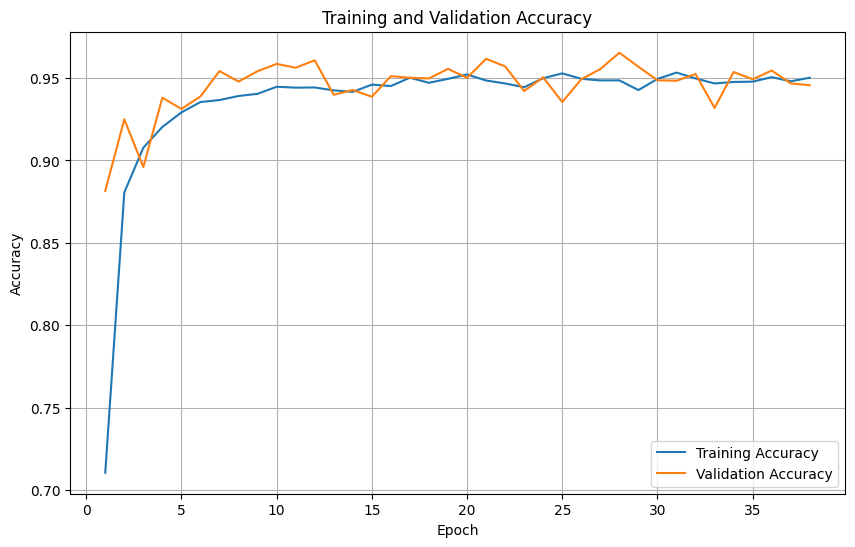

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
test_loss, test_acc = rnn_model.evaluate(test_image, test_label)
train_loss, train_acc = rnn_model.evaluate(train_image, train_label)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.1565 - accuracy: 0.9655


In [30]:
print(f'Test Accuracy: {test_acc* 100 :.4f}')
print(f'Train Accuracy: {train_acc* 100 :.4f}')

Test Accuracy: 96.5300
Train Accuracy: 96.5517


### 7. Predictions

#### 7.1 Making predictions using your trained model on the first ten images in our test dataset and comparing those predictions to the true labels. 

In [32]:
test_predictions = rnn_model.predict(test_image)
test_predicted_classes = np.argmax(test_predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [33]:
train_predictions = rnn_model.predict(train_image)
train_predicted_classes = np.argmax(train_predictions, axis=1)

1875/1875 [==============================] - 4s 2ms/step


In [34]:
for i in range(10):
    print(f"{i + 1}: Predicted Class {test_predicted_classes[i]}, True Label {np.argmax(test_label[i])}")

1: Predicted Class 7, True Label 7
2: Predicted Class 2, True Label 2
3: Predicted Class 1, True Label 1
4: Predicted Class 0, True Label 0
5: Predicted Class 4, True Label 4
6: Predicted Class 1, True Label 1
7: Predicted Class 4, True Label 4
8: Predicted Class 9, True Label 9
9: Predicted Class 5, True Label 5
10: Predicted Class 9, True Label 9


In [35]:
for i in range(10):
    print(f"{i + 1}: Predicted Class {train_predicted_classes[i]}, True Label {np.argmax(train_label[i])}")

1: Predicted Class 5, True Label 5
2: Predicted Class 0, True Label 0
3: Predicted Class 4, True Label 4
4: Predicted Class 1, True Label 1
5: Predicted Class 9, True Label 9
6: Predicted Class 2, True Label 2
7: Predicted Class 1, True Label 1
8: Predicted Class 3, True Label 3
9: Predicted Class 1, True Label 1
10: Predicted Class 4, True Label 4


### 7.2 Images along with their true and predicted labels 

In [36]:
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]

In [37]:
def images_labels(images, true_labels, predicted_labels, class_labels, num_images=15):
    #rows based on num_images
    num_rows = (num_images + 1) // 5
     #maximum 5 columns
    num_cols = min(num_images, 5) 
    plt.figure(figsize=(12, 6))
    #for loop to iterate over number of images
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        #true class index
        true_class_index = true_labels[i]
        #predicted class index
        predicted_class_index = predicted_labels[i]
        plt.title(f"True: {class_labels[true_class_index]}\nPredicted: {class_labels[predicted_class_index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#### Train set prediction 

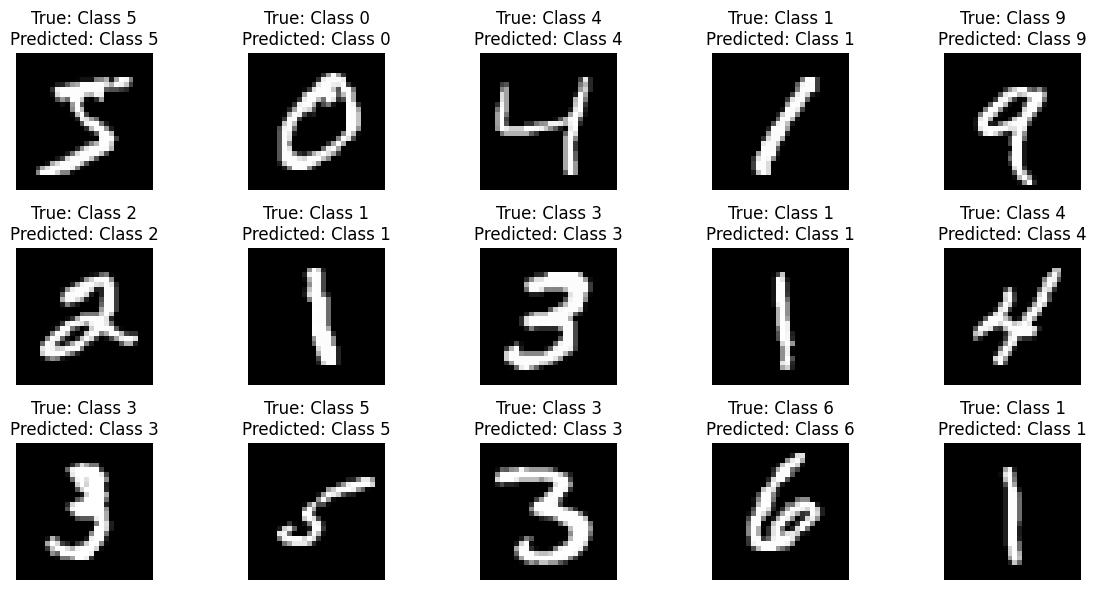

In [38]:
#train dataset correctly predicted classes 
images_labels(train_image, [np.argmax(label) for label in train_label], train_predicted_classes, class_labels, num_images=15)

#### Test set prediction

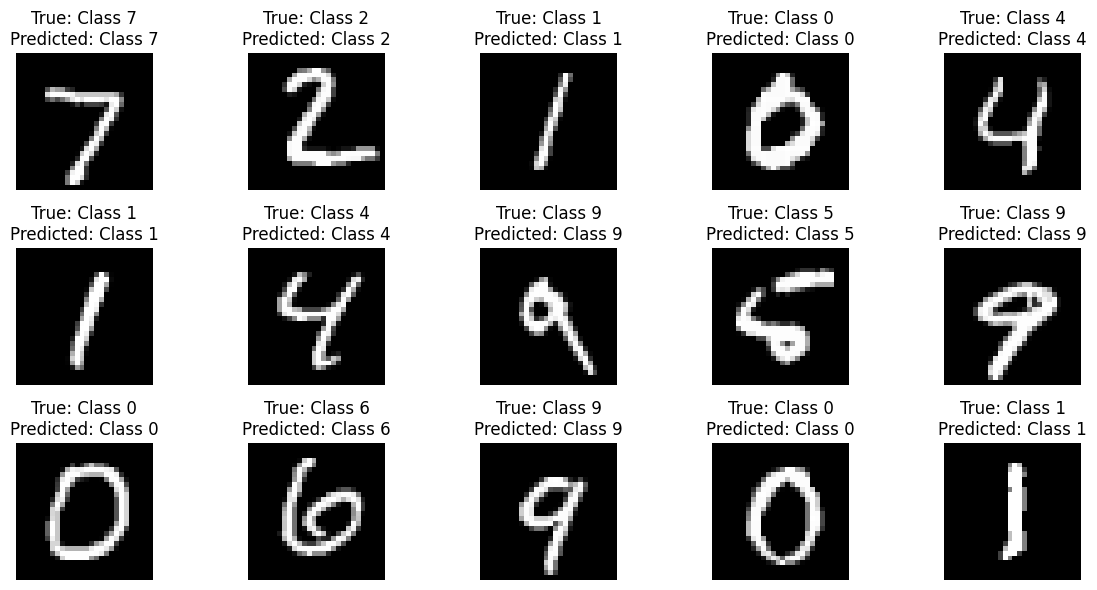

In [39]:
#test dataset correctly predicted classes 
images_labels(test_image, [np.argmax(label) for label in test_label], test_predicted_classes, class_labels, num_images=15)

### 7.3 Displaying a subset of 10 images starting from index 100 of the train & test image array along with their true and predicted labels and image indices. 

#### Randomly indexing and checking prediction of train set

In [40]:
def images_labels(images, true_labels, predicted_labels, class_labels, start_index=0, num_images=15):
    #number of rows based on num_images
    num_rows = (num_images + 1) // 5 
    #5 columns
    num_cols = min(num_images, 5) 
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        true_class_index = true_labels[i]
        predicted_class_index = predicted_labels[i]
        plt.title(f"Index: {start_index + i}\nTrue: {class_labels[true_class_index]}\nPredicted: {class_labels[predicted_class_index]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

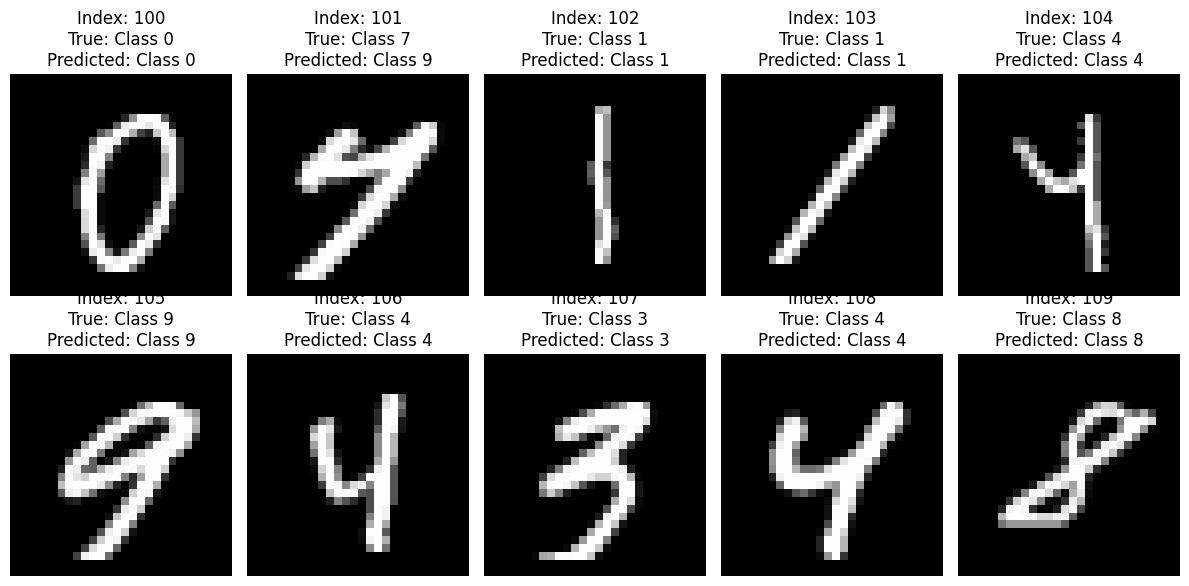

In [41]:
images_labels(train_image[1000:1010], [np.argmax(label) for label in train_label[1000:1010]], train_predicted_classes[1000:1010], class_labels, start_index=100, num_images=10)

#### Randomly indexing and checking prediction of test set

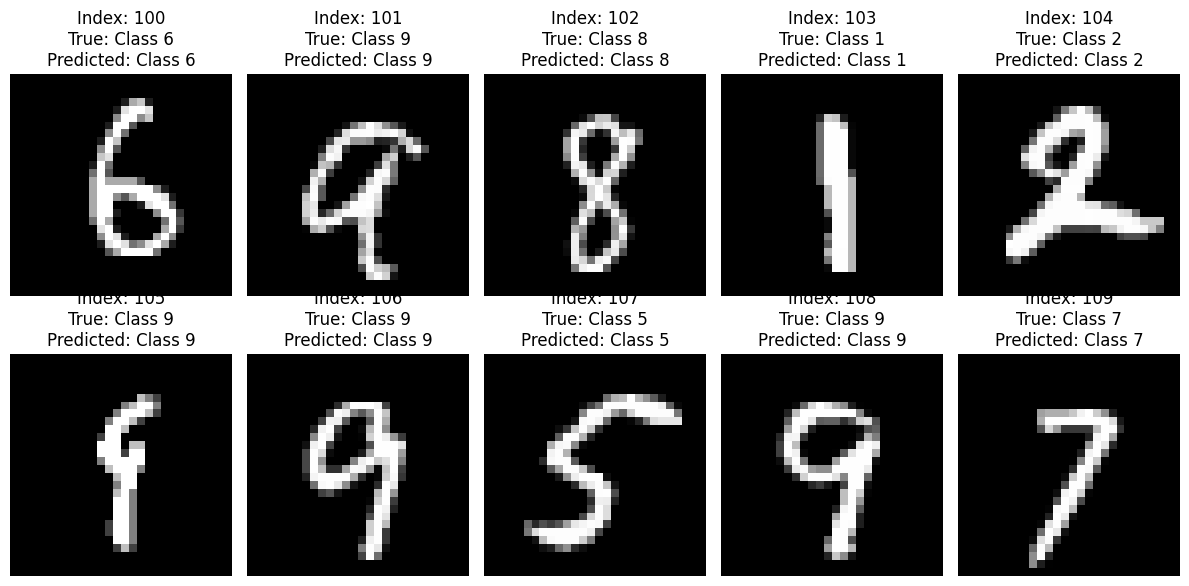

In [42]:
images_labels(test_image[3000:3010], [np.argmax(label) for label in test_label[3000:3010]], test_predicted_classes[3000:3010], class_labels, start_index=100, num_images=10)

### 8. Cofusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate

In [44]:
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]

In [50]:
def train_test_confusion_matrices(train_confusion, test_confusion, class_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

    #confusion matrix for train data
    disp_train = ConfusionMatrixDisplay(train_confusion, display_labels=class_labels)
    disp_train.plot(ax=ax1, values_format='d', xticks_rotation='vertical')
    ax1.set_title('Train Confusion Matrix')

    #confusion matrix for test data
    disp_test = ConfusionMatrixDisplay(test_confusion, display_labels=class_labels)
    disp_test.plot(ax=ax2, values_format='d', xticks_rotation='vertical')
    ax2.set_title('Test Confusion Matrix')

    plt.tight_layout()
    plt.show()

In [51]:
train_confusion = confusion_matrix([np.argmax(label) for label in train_label], train_predicted_classes)
test_confusion = confusion_matrix([np.argmax(label) for label in test_label], test_predicted_classes)

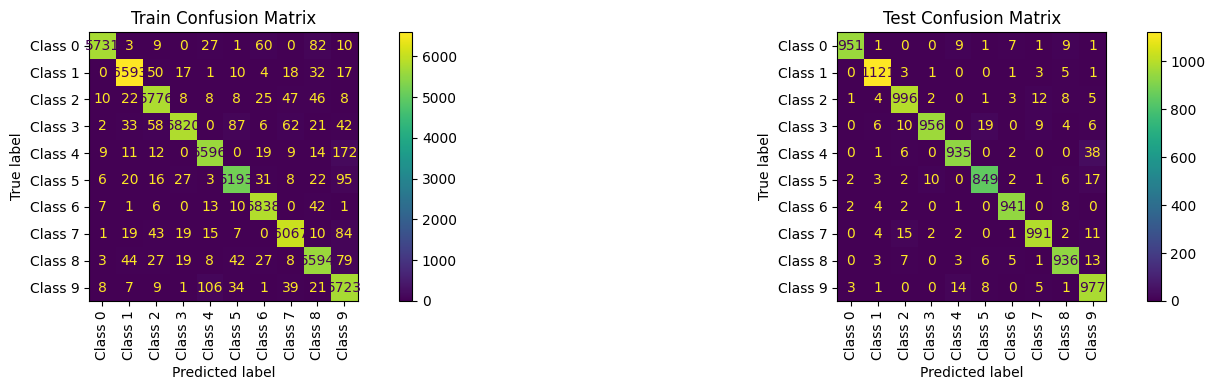

In [52]:
train_test_confusion_matrices(train_confusion, test_confusion, class_labels)

In [53]:
train_confusion

array([[5731,    3,    9,    0,   27,    1,   60,    0,   82,   10],
       [   0, 6593,   50,   17,    1,   10,    4,   18,   32,   17],
       [  10,   22, 5776,    8,    8,    8,   25,   47,   46,    8],
       [   2,   33,   58, 5820,    0,   87,    6,   62,   21,   42],
       [   9,   11,   12,    0, 5596,    0,   19,    9,   14,  172],
       [   6,   20,   16,   27,    3, 5193,   31,    8,   22,   95],
       [   7,    1,    6,    0,   13,   10, 5838,    0,   42,    1],
       [   1,   19,   43,   19,   15,    7,    0, 6067,   10,   84],
       [   3,   44,   27,   19,    8,   42,   27,    8, 5594,   79],
       [   8,    7,    9,    1,  106,   34,    1,   39,   21, 5723]],
      dtype=int64)

In [54]:
test_confusion

array([[ 951,    1,    0,    0,    9,    1,    7,    1,    9,    1],
       [   0, 1121,    3,    1,    0,    0,    1,    3,    5,    1],
       [   1,    4,  996,    2,    0,    1,    3,   12,    8,    5],
       [   0,    6,   10,  956,    0,   19,    0,    9,    4,    6],
       [   0,    1,    6,    0,  935,    0,    2,    0,    0,   38],
       [   2,    3,    2,   10,    0,  849,    2,    1,    6,   17],
       [   2,    4,    2,    0,    1,    0,  941,    0,    8,    0],
       [   0,    4,   15,    2,    2,    0,    1,  991,    2,   11],
       [   0,    3,    7,    0,    3,    6,    5,    1,  936,   13],
       [   3,    1,    0,    0,   14,    8,    0,    5,    1,  977]],
      dtype=int64)

- Diagonal Values: The values along the diagonal (from top-left to bottom-right) represent the number of correct predictions for each class. The higher these numbers, the better the model's performance in correctly predicting each class.


### 9. Classification Report 

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tabulate import tabulate

In [56]:
#one-hot encoded labels back to categorical labels
test_true_classes = np.argmax(test_label, axis=1)
#classification report
test_report = classification_report(test_true_classes, test_predicted_classes, target_names=class_labels)

In [57]:
print(test_report)

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       980
     Class 1       0.98      0.99      0.98      1135
     Class 2       0.96      0.97      0.96      1032
     Class 3       0.98      0.95      0.97      1010
     Class 4       0.97      0.95      0.96       982
     Class 5       0.96      0.95      0.96       892
     Class 6       0.98      0.98      0.98       958
     Class 7       0.97      0.96      0.97      1028
     Class 8       0.96      0.96      0.96       974
     Class 9       0.91      0.97      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [58]:
#one-hot encoded labels back to categorical labels
train_true_classes = np.argmax(train_label, axis=1)
#classification report
train_report = classification_report(train_true_classes, train_predicted_classes, target_names=class_labels)

In [59]:
print(train_report)

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98      5923
     Class 1       0.98      0.98      0.98      6742
     Class 2       0.96      0.97      0.97      5958
     Class 3       0.98      0.95      0.97      6131
     Class 4       0.97      0.96      0.96      5842
     Class 5       0.96      0.96      0.96      5421
     Class 6       0.97      0.99      0.98      5918
     Class 7       0.97      0.97      0.97      6265
     Class 8       0.95      0.96      0.95      5851
     Class 9       0.92      0.96      0.94      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



- The model demonstrates exceptional performance on both the training and test sets, with high precision, recall, and F1-scores. This suggests that the model is both accurate and robust, able to correctly classify instances across different classes with high reliability.

### 10. Correct & Incorrect Classes Classification 

In [60]:
#creating function to calculate correct and false predictions
def correct_predictions(cnn_model, train_data, train_label, test_data, test_label, class_labels):
    def calculate_predictions(data, labels):
        predictions = cnn_model.predict(data)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(labels, axis=1)
        confusion = confusion_matrix(true_classes, predicted_classes)

        correct_predictions_per_class = []
        false_predictions_per_class = []

        for i, label in enumerate(class_labels):
            correct_predictions = confusion[i, i]  
            false_predictions = sum(confusion[i, :]) - correct_predictions 
            correct_predictions_per_class.append(correct_predictions)
            false_predictions_per_class.append(false_predictions)

        overall_correct_predictions = sum(correct_predictions_per_class)
        overall_false_predictions = sum(false_predictions_per_class)

        return correct_predictions_per_class, false_predictions_per_class, overall_correct_predictions, overall_false_predictions

    print("Test Data Predictions:")
    test_correct, test_false, overall_correct_test, overall_false_test = calculate_predictions(test_data, test_label)

    #test data
    test_data_table = []
    for i, label in enumerate(class_labels):
        test_data_table.append([label, test_correct[i], test_false[i]])

    test_headers = ["Class", "Correct Predictions", "False Predictions"]
    test_table = tabulate(test_data_table, test_headers, tablefmt="pretty")
    print(test_table)
    print("\nOverall Correct Predictions for Test Data:", overall_correct_test)
    print("Overall False Predictions for Test Data:", overall_false_test)

    print("\nTrain Data Predictions:")
    train_correct, train_false, overall_correct_train, overall_false_train = calculate_predictions(train_data, train_label)

    #train data
    train_data_table = []
    for i, label in enumerate(class_labels):
        train_data_table.append([label, train_correct[i], train_false[i]])

    train_headers = ["Class", "Correct Predictions", "False Predictions"]
    train_table = tabulate(train_data_table, train_headers, tablefmt="pretty")
    print(train_table)
    print("\nOverall Correct Predictions for Train Data:", overall_correct_train)
    print("Overall False Predictions for Train Data:", overall_false_train)

In [62]:
correct_predictions(rnn_model, train_image, train_label, test_image, test_label, class_labels)

Test Data Predictions:
313/313 [==============================] - 1s 2ms/step
+---------+---------------------+-------------------+
|  Class  | Correct Predictions | False Predictions |
+---------+---------------------+-------------------+
| Class 0 |         951         |        29         |
| Class 1 |        1121         |        14         |
| Class 2 |         996         |        36         |
| Class 3 |         956         |        54         |
| Class 4 |         935         |        47         |
| Class 5 |         849         |        43         |
| Class 6 |         941         |        17         |
| Class 7 |         991         |        37         |
| Class 8 |         936         |        38         |
| Class 9 |         977         |        32         |
+---------+---------------------+-------------------+

Overall Correct Predictions for Test Data: 9653
Overall False Predictions for Test Data: 347

Train Data Predictions:
1875/1875 [==============================] - 4s

### 11. Each Classes Accuracy 

In [63]:
#creating function to check accuracy of each classes
def display_class_accuracies(cnn_model, train_data, train_label, test_data, test_label, class_labels):
    def class_accuracies(predictions, true_labels):
        if predictions.ndim > 1 and predictions.shape[1] > 1:
            predictions = np.argmax(predictions, axis=1)
        if true_labels.ndim > 1 and true_labels.shape[1] > 1:
            true_labels = np.argmax(true_labels, axis=1)
            
        confusion = confusion_matrix(true_labels, predictions)
        class_accuracies = []

        for i in range(len(class_labels)):
            correct_predictions = confusion[i, i]  
            total_true_instances = sum(confusion[i, :])  
            accuracy = correct_predictions / total_true_instances if total_true_instances > 0 else 0.0
            class_accuracies.append(accuracy)

        return class_accuracies

    #class accuracies for test data
    test_predictions = cnn_model.predict(test_data)
    test_predicted_classes = np.argmax(test_predictions, axis=1)
    test_true_classes = np.argmax(test_label, axis=1)
    test_class_accuracies = class_accuracies(test_predicted_classes, test_true_classes)

    #class accuracies for train data
    train_predictions = cnn_model.predict(train_data)
    train_predicted_classes = np.argmax(train_predictions, axis=1)
    train_true_classes = np.argmax(train_label, axis=1)
    train_class_accuracies = class_accuracies(train_predicted_classes, train_true_classes)

    #class accuracies using tabulate
    headers = ["Class", "Test Accuracy (%)", "Train Accuracy (%)"]
    data = []
    for i, label in enumerate(class_labels):
        data.append([label, f"{test_class_accuracies[i] * 100:.2f}", f"{train_class_accuracies[i] * 100:.2f}"])

    table = tabulate(data, headers, tablefmt="pretty")
    print(table)

In [64]:
display_class_accuracies(rnn_model, train_image, train_label, test_image, test_label, class_labels)

1875/1875 [==============================] - 4s 2ms/step
+---------+-------------------+--------------------+
|  Class  | Test Accuracy (%) | Train Accuracy (%) |
+---------+-------------------+--------------------+
| Class 0 |       97.04       |       96.76        |
| Class 1 |       98.77       |       97.79        |
| Class 2 |       96.51       |       96.95        |
| Class 3 |       94.65       |       94.93        |
| Class 4 |       95.21       |       95.79        |
| Class 5 |       95.18       |       95.79        |
| Class 6 |       98.23       |       98.65        |
| Class 7 |       96.40       |       96.84        |
| Class 8 |       96.10       |       95.61        |
| Class 9 |       96.83       |       96.20        |
+---------+-------------------+--------------------+


### 12. ROC Curve 

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [66]:
def roc_curves(model, train_data, train_labels, test_data, test_labels, class_labels):
    #one-hot encode labels to binary labels
    train_true_classes_binary = label_binarize(train_labels, classes=list(range(len(class_labels))))
    test_true_classes_binary = label_binarize(test_labels, classes=list(range(len(class_labels))))

    #model predictions for all classes at once
    train_predictions = model.predict(train_data)
    test_predictions = model.predict(test_data)

    #roc curve and ROC area for each class
    train_fpr = {}
    train_tpr = {}
    train_roc_auc = {}
    test_fpr = {}
    test_tpr = {}
    test_roc_auc = {}

    n_classes = len(class_labels)
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'blue', 'red', 'purple', 'brown', 'pink', 'gray'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    for i, color in zip(range(n_classes), colors):
        #roc for training data
        train_fpr[i], train_tpr[i], _ = roc_curve(train_true_classes_binary[:, i], train_predictions[:, i])
        train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

        #roc for test data
        test_fpr[i], test_tpr[i], _ = roc_curve(test_true_classes_binary[:, i], test_predictions[:, i])
        test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])
        ax1.plot(train_fpr[i], train_tpr[i], color=color, lw=2, label=f'Training ROC curve (area = {train_roc_auc[i]:.2f}) for Class {i}')
        ax2.plot(test_fpr[i], test_tpr[i], color=color, linestyle='--', lw=2, label=f'Test ROC curve (area = {test_roc_auc[i]:.2f}) for Class {i}')
        
    for ax in [ax1, ax2]:
        ax.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower right')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5, color='grey')
    ax1.set_title('Training ROC Curves')
    ax2.set_title('Test ROC Curves')
    plt.show()

313/313 [==============================] - 1s 2ms/step


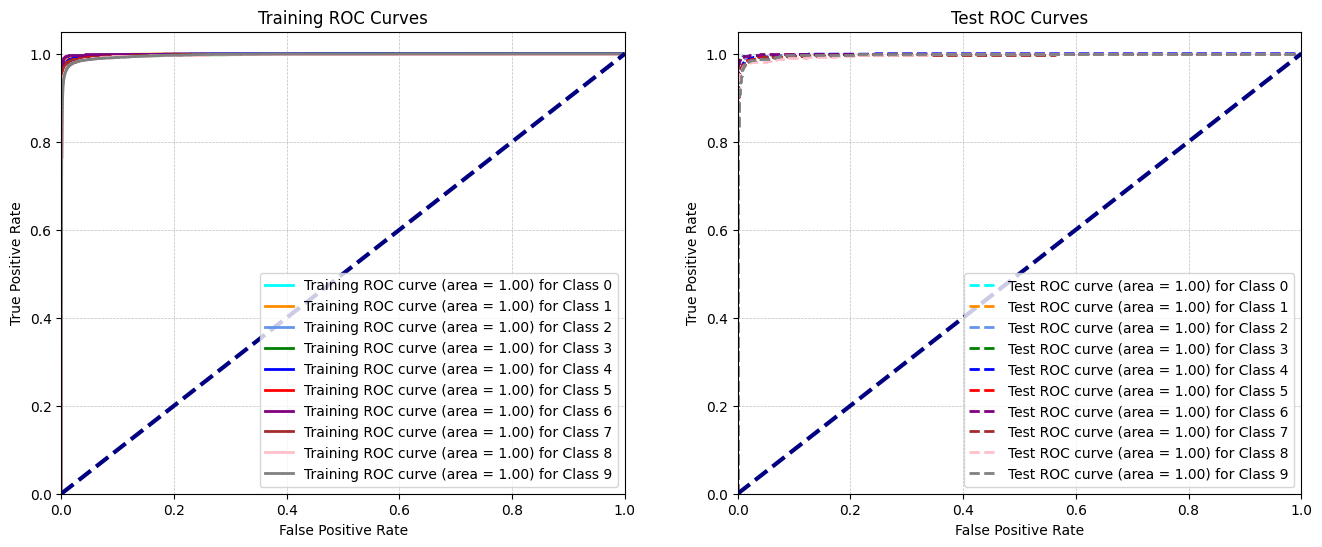

In [67]:
#roc_curves function
roc_curves(rnn_model, train_image, train_label, test_image, test_label, class_labels)

### References: 

## Dataset: https://www.kaggle.com/datasets/hojjatk/mnist-dataset